In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

In [2]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns; sns.set()


from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

%matplotlib inline

In [10]:
ads = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])
currency = pd.read_csv('currency.csv', index_col=['Time'], parse_dates=['Time'])
ads.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [4]:
df = pd.read_csv("gangnam_price.csv", encoding = "cp949")
a = df["계약년월"].values
b = df["계약일"].values
date = []
for i in range(len(a)):
    date.append(str(a[i])[:4] + '-' + str(a[i])[4:] + '-' + str(b[i]))
df["계약시기"] = date


df = df.replace(',','', regex=True)
a = pd.to_numeric(df["거래금액(만원)"])
df["price"] = a

In [9]:
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,계약시기,price
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.750,202006,23,149500,4,1988,언주로 103,NaN,2020-06-23,149500
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,18,162750,4,1987,언주로 3,NaN,2020-06-18,162750
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,20,160000,5,1987,언주로 3,NaN,2020-06-20,160000
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,22,150000,2,1987,언주로 3,NaN,2020-06-22,150000
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,67.280,202006,25,165000,2,1987,언주로 3,20200916.0,2020-06-25,165000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,서울특별시 강남구 청담동,106,106,0,현대한강빌라,136.260,202004,17,185000,3,1992,도산대로85길 56,NaN,2020-04-17,185000
4107,서울특별시 강남구 청담동,115-17,115,17,호원빌라,244.490,202102,6,380000,2,1999,압구정로75길 15,NaN,2021-02-6,380000
4108,서울특별시 강남구 청담동,101,101,0,효성빌라 청담101(A동),226.740,202011,26,620000,5,2019,압구정로71길 28,NaN,2020-11-26,620000
4109,서울특별시 강남구 청담동,5-25,5,25,휴먼스타빌,39.950,202012,5,75000,9,2005,도산대로 454,NaN,2020-12-5,75000


In [12]:
df_day_1 = pd.DataFrame(df.groupby("계약시기").count()["price"])
df_day_1 = df_day_1.rename(columns = {"price"})
# 시간에 따른 부동산 거래 발생 횟수: "count"

df_day_1

TypeError: 'set' object is not callable

In [5]:
plotMovingAverage(df, 4) 

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,계약시기,price
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.750,202006,23,149500,4,1988,언주로 103,NaN,2020-06-23,149500
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,18,162750,4,1987,언주로 3,NaN,2020-06-18,162750
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,20,160000,5,1987,언주로 3,NaN,2020-06-20,160000
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,22,150000,2,1987,언주로 3,NaN,2020-06-22,150000
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,67.280,202006,25,165000,2,1987,언주로 3,20200916.0,2020-06-25,165000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,서울특별시 강남구 청담동,106,106,0,현대한강빌라,136.260,202004,17,185000,3,1992,도산대로85길 56,NaN,2020-04-17,185000
4107,서울특별시 강남구 청담동,115-17,115,17,호원빌라,244.490,202102,6,380000,2,1999,압구정로75길 15,NaN,2021-02-6,380000
4108,서울특별시 강남구 청담동,101,101,0,효성빌라 청담101(A동),226.740,202011,26,620000,5,2019,압구정로71길 28,NaN,2020-11-26,620000
4109,서울특별시 강남구 청담동,5-25,5,25,휴먼스타빌,39.950,202012,5,75000,9,2005,도산대로 454,NaN,2020-12-5,75000


In [7]:
ads

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630
...,...
2017-09-21 19:00:00,155890
2017-09-21 20:00:00,123395
2017-09-21 21:00:00,103080


In [8]:
currency

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775
...,...
2018-02-20,2166449
2018-02-21,1552313
2018-02-22,2175548


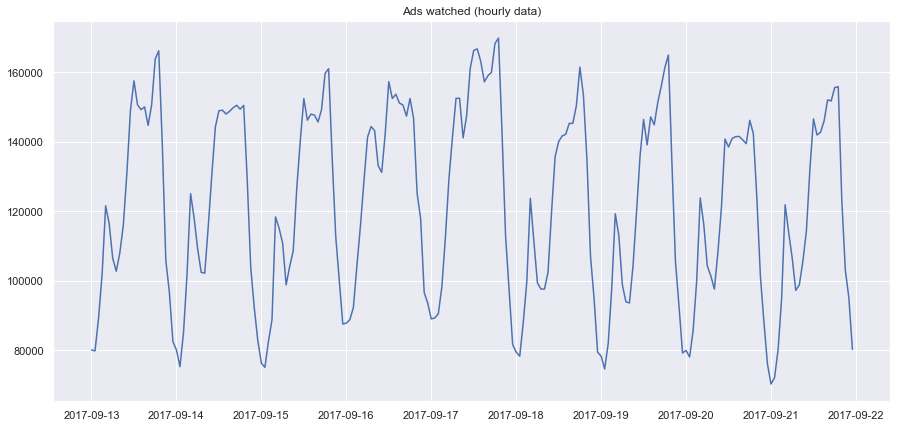

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(ads.Ads)
plt.title('Ads watched (hourly data)')
plt.grid(True)
plt.show()

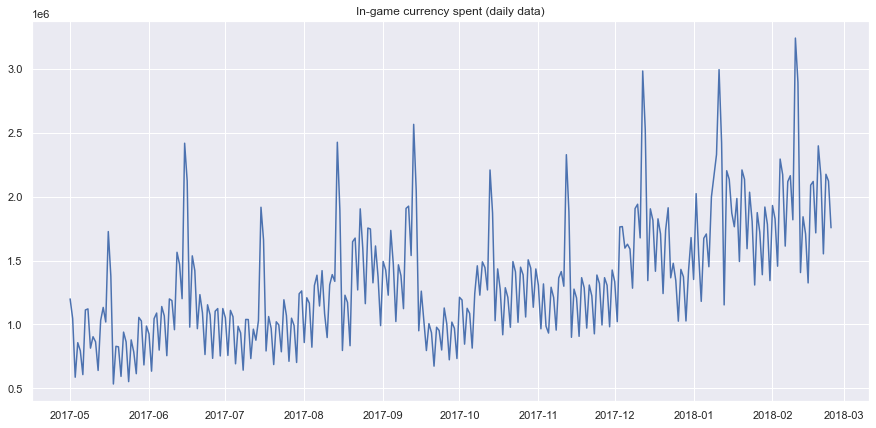

In [9]:
plt.figure(figsize=(15, 7))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title('In-game currency spent (daily data)')
plt.grid(True)
plt.show()

## Forecast quality metrics

In [6]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Move, smoothe, evaluate

In [7]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(ads, 24) # prediction for the last observed day (past 24 hours)

116805.0

In [8]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

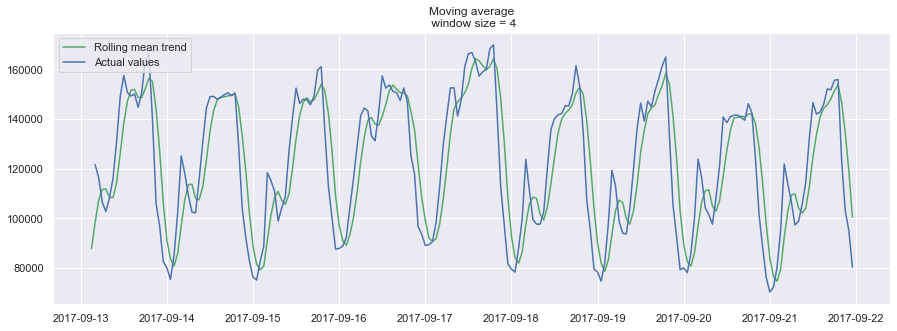

In [14]:
plotMovingAverage(ads, 4) 

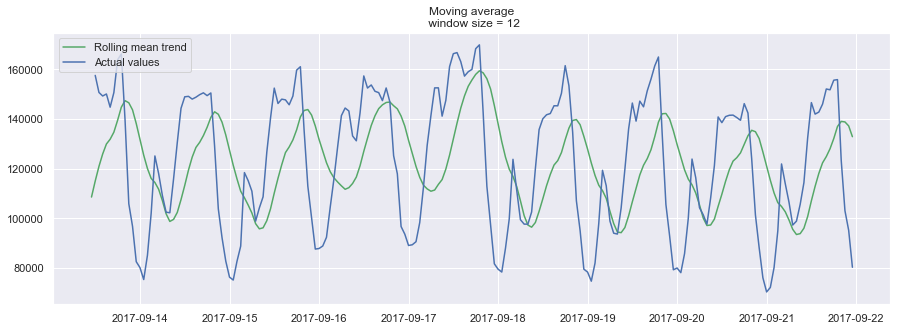

In [15]:
plotMovingAverage(ads, 12) 

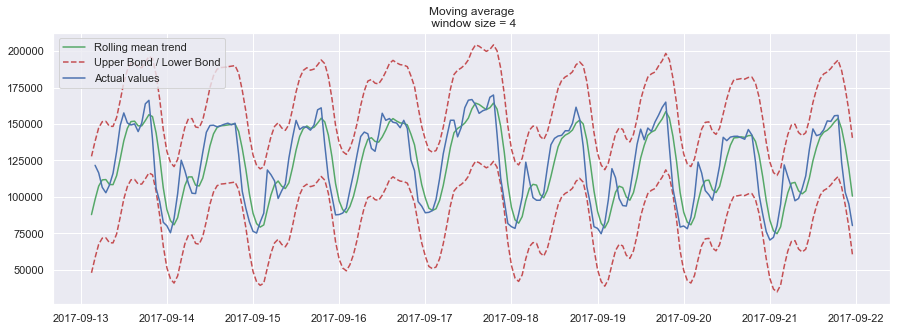

In [16]:
plotMovingAverage(ads, 4, plot_intervals=True)

In [17]:
ads_anomaly = ads.copy()
ads_anomaly.iloc[-20] = ads_anomaly.iloc[-20] * 0.2 # say we have 80% drop of ads 

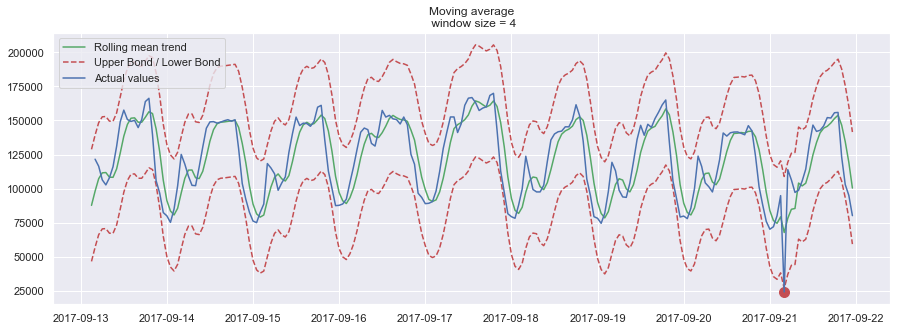

In [20]:
plotMovingAverage(ads_anomaly, 4, plot_intervals=True, plot_anomalies=True)

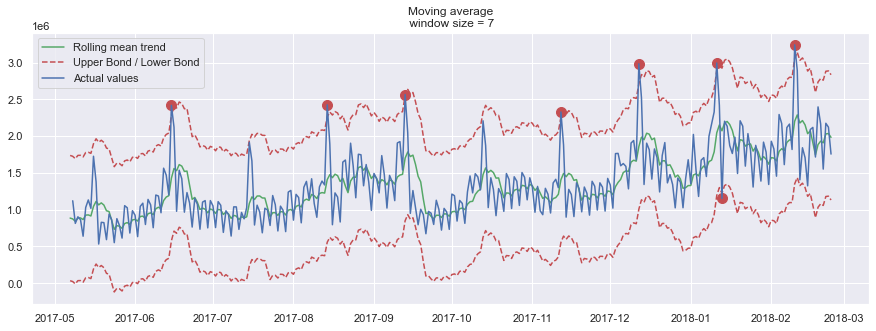

In [21]:
plotMovingAverage(currency, 7, plot_intervals=True, plot_anomalies=True) # weekly smoothing

In [22]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [23]:
weighted_average(ads, [0.6, 0.3, 0.1])

87025.5

## Exponential smoothing